## Instalaciones requeridas

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install geopandas
!pip install seaborn

## Importación de librerias

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

## Carga de datos

In [159]:
# Ruta al archivo CSV
ruta_csv = 'netflix_titles.csv'

# Cargar el archivo CSV en un DataFrame de pandas
data_frame = pd.read_csv(ruta_csv)


## Pregunta 1: ¿Cuál es la distribución de películas y programas de televisión por país de origen?

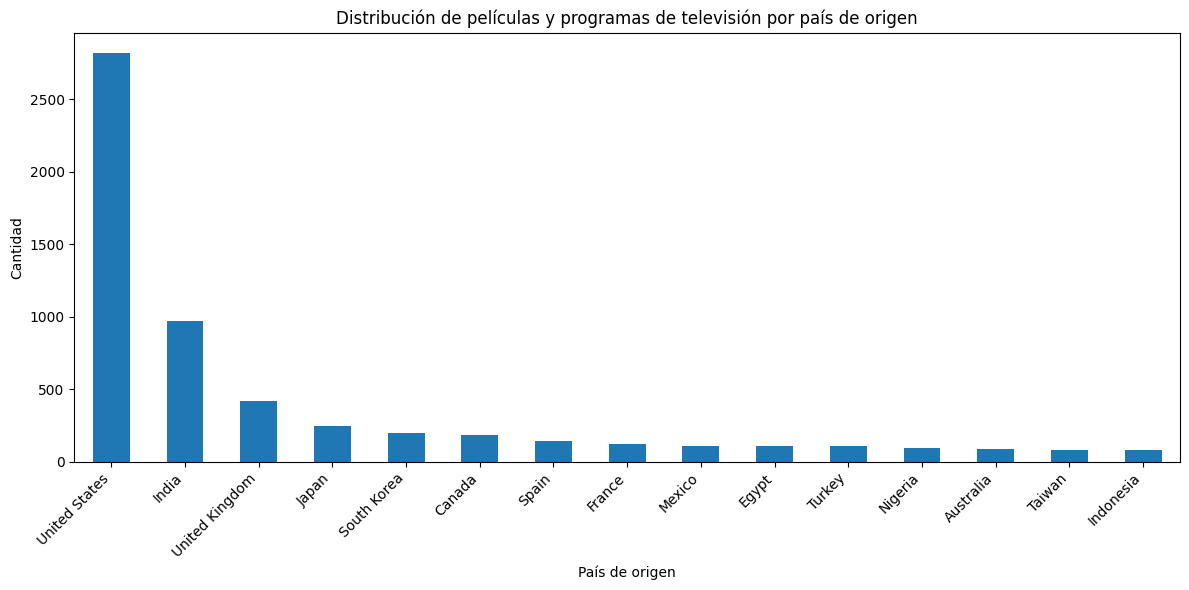

In [161]:
# Contar la cantidad de películas y programas de TV por país de origen
country_counts = data_frame['country'].value_counts().dropna()
# Filtrar solo los países con más de 10 producciones
n_paises = 15
filtered_counts = country_counts[country_counts > 10][:n_paises]
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.xlabel('País de origen')
plt.ylabel('Cantidad')
plt.title('Distribución de películas y programas de televisión por país de origen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q1.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

### Resultados en formato tabla

In [162]:
df_counts = pd.DataFrame(country_counts)
df_counts.columns = ['Cantidad']
df_counts.index.name = 'País'
print(df_counts.head(n_paises))


                Cantidad
País                    
United States       2818
India                972
United Kingdom       419
Japan                245
South Korea          199
Canada               181
Spain                145
France               124
Mexico               110
Egypt                106
Turkey               105
Nigeria               95
Australia             87
Taiwan                81
Indonesia             79


- Estados Unidos (United States) tiene la mayor cantidad de contenido disponible en Netflix, con 2818 películas y programas de televisión. Esto no es sorprendente, ya que Estados Unidos es el país de origen de Netflix y también tiene una industria cinematográfica y televisiva muy desarrollada.

- India ocupa el segundo lugar con 972 películas y programas de televisión. Esto destaca la popularidad y el éxito del contenido indio en la plataforma, como las producciones de Bollywood y las series de televisión indias.

- El Reino Unido (United Kingdom) tiene 419 películas y programas de televisión en Netflix. Esto puede atribuirse a la larga tradición cinematográfica y televisiva del Reino Unido, con una amplia variedad de contenido que ha ganado reconocimiento internacional.

- Japón y Corea del Sur (South Korea) también tienen una presencia significativa en Netflix, con 245 y 199 películas y programas de televisión respectivamente. Esto refleja la popularidad de los dramas, películas y programas de televisión japoneses y coreanos en el mercado global.

- Otros países como Canadá, España, Francia, México, Egipto, Turquía, Nigeria, Australia, Taiwán e Indonesia también contribuyen con una cantidad considerable de contenido en Netflix, lo que demuestra la diversidad cultural y la expansión global de la plataforma.

En resumen, Netflix ofrece una amplia variedad de contenido de diferentes países, siendo Estados Unidos e India los principales contribuyentes en términos de cantidad. Sin embargo, hay una representación significativa de contenido de otras regiones del mundo, lo que brinda a los usuarios una experiencia diversa y multicultural al disfrutar del contenido en la plataforma.

## Pregunta 2: ¿Cuál es la evolución temporal de la cantidad de películas y programas de televisión agregados a Netflix?

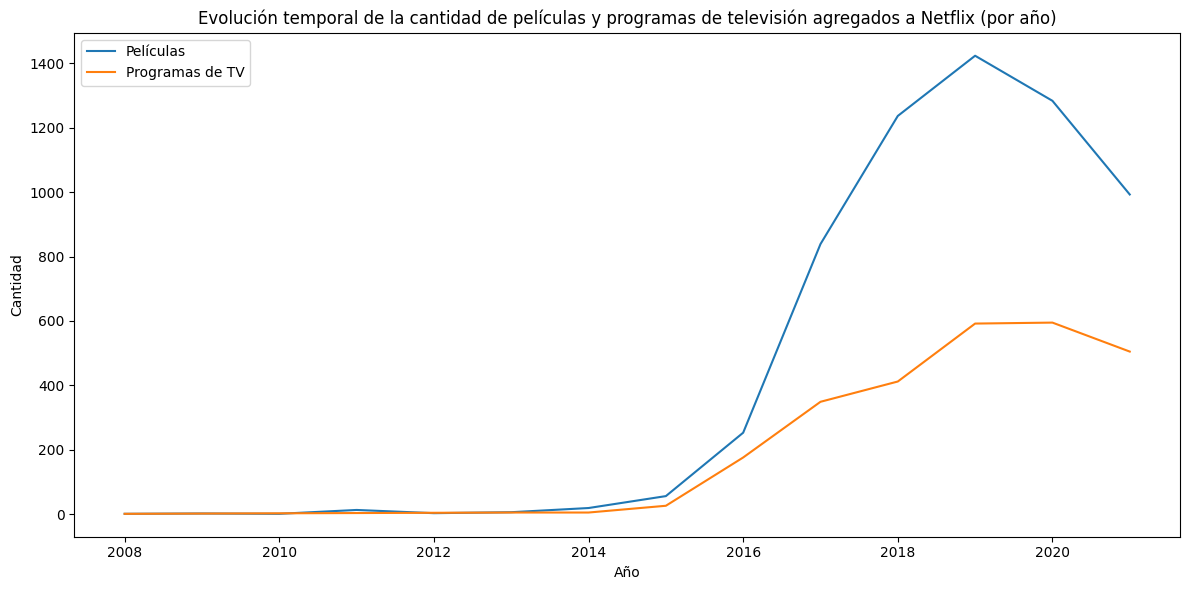

In [151]:
# Convertir la columna 'date_added' al formato de fecha
data_frame['date_added'] = pd.to_datetime(data_frame['date_added'])
# Extraer el año y el mes de la columna 'date_added'
data_frame['year_added'] = data_frame['date_added'].dt.year
data_frame['month_added'] = data_frame['date_added'].dt.month
# Contar la cantidad de películas y programas de TV agregados por año o por mes
movies_added_by_year = data_frame[data_frame['type'] == 'Movie']['year_added'].value_counts().sort_index()
shows_added_by_year = data_frame[data_frame['type'] == 'TV Show']['year_added'].value_counts().sort_index()
movies_added_by_month = data_frame[data_frame['type'] == 'Movie']['month_added'].value_counts().sort_index()
shows_added_by_month = data_frame[data_frame['type'] == 'TV Show']['month_added'].value_counts().sort_index()
# Crear el gráfico de líneas para la evolución por año
plt.figure(figsize=(12, 6))
plt.plot(movies_added_by_year.index, movies_added_by_year.values, label='Películas')
plt.plot(shows_added_by_year.index, shows_added_by_year.values, label='Programas de TV')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Evolución temporal de la cantidad de películas y programas de televisión agregados a Netflix (por año)')
plt.legend()
plt.tight_layout()
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q2.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico de líneas para la evolución por año
plt.show()

## Pregunta 3: ¿Cuál es la proporción de películas y programas de televisión por clasificación de contenido (rating)?

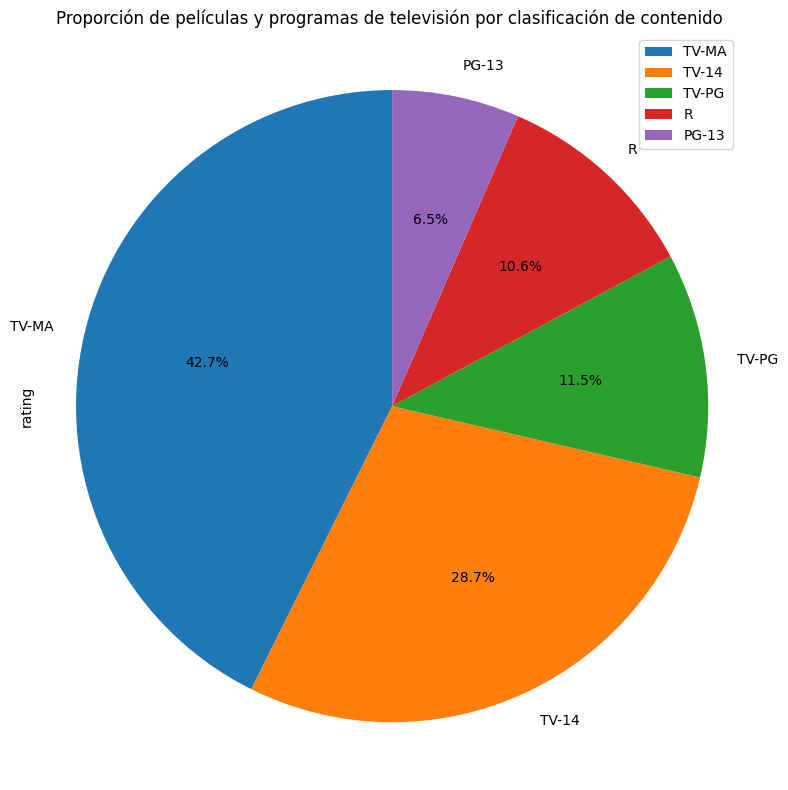

In [152]:
# Contar la cantidad de películas y programas de TV por clasificación de contenido (rating)
num_max = 5
rating_counts = data_frame['rating'].value_counts()[:num_max]
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de películas y programas de televisión por clasificación de contenido')
plt.legend()
plt.tight_layout()
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q3.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

### Resultados en formato tabla

In [153]:
# Crear un DataFrame a partir del objeto rating_counts
df_counts = pd.DataFrame(rating_counts)
# Renombrar la columna del DataFrame como 'Cantidad'
df_counts.columns = ['Cantidad']
# Establecer el nombre del índice del DataFrame como 'Clasificación de contenido'
df_counts.index.name = 'Clasificación de contenido'
# Calcular el total de la columna 'Cantidad'
total = df_counts['Cantidad'].sum()
# Calcular la proporción dividiendo la columna 'Cantidad' por el total y multiplicando por 100
df_counts['Proporción'] = (df_counts['Cantidad'] / total) * 100
# Redondear la columna 'Proporción' a 1 decimal
df_counts['Proporción'] = df_counts['Proporción'].round(1)
# Mostrar el DataFrame con los resultados
print(df_counts)


                            Cantidad  Proporción
Clasificación de contenido                      
TV-MA                           3207        42.7
TV-14                           2160        28.7
TV-PG                            863        11.5
R                                799        10.6
PG-13                            490         6.5


- La clasificación de contenido "TV-MA" es la más representativa, con un 42.7% del total. Esto indica que hay una cantidad significativa de contenido en Netflix que está destinado a un público adulto y puede contener material explícito o inapropiado para audiencias más jóvenes.

- La clasificación "TV-14" ocupa el segundo lugar en términos de proporción, con un 28.7%. Esto sugiere que hay una considerable cantidad de contenido diseñado para adolescentes, con contenido que puede ser más maduro o tener temáticas más intensas.

- La clasificación "TV-PG" representa el 11.5% del total, lo que indica que hay un número significativo de programas de televisión y películas en Netflix que son aptos para audiencias de todas las edades bajo la supervisión de los padres o tutores.

- Las clasificaciones "R" y "PG-13" representan el 10.6% y el 6.5% respectivamente. Estas clasificaciones indican que hay contenido más orientado a audiencias adultas, con contenido que puede ser más violento, tener lenguaje fuerte o contener temáticas más intensas.

En resumen, Netflix ofrece una variedad de contenido en diferentes clasificaciones de contenido para satisfacer las preferencias de audiencias de distintas edades y niveles de madurez. Las clasificaciones "TV-MA" y "TV-14" son las más prominentes, lo que indica que hay una amplia gama de contenido dirigido a adultos y adolescentes en la plataforma. Sin embargo, también se ofrece contenido apropiado para audiencias más jóvenes con clasificaciones como "TV-PG".

## Pregunta 4: ¿Cuál es la relación entre la duración de una película o programa de televisión y su clasificación de contenido?

/var/folders/6j/g3h167pd5yq6sg2g3br58cgw0000gn/T/ipykernel_33848/964980970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)').astype(float)


<Figure size 1000x600 with 0 Axes>

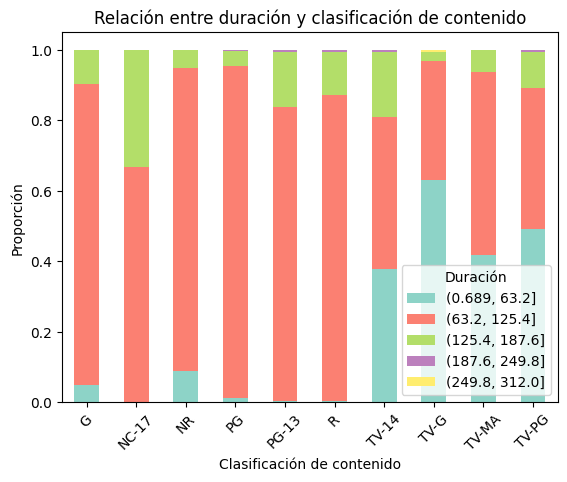

In [154]:
df_filtered = data_frame.dropna(subset=['duration', 'rating'])
df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)').astype(float)
# Crear un DataFrame de frecuencias cruzadas para clasificación de contenido y duración
cross_table = pd.crosstab(df_filtered['rating'], pd.cut(df_filtered['duration'], bins=5))
# Normalizar las frecuencias cruzadas para obtener proporciones
normalized_table = cross_table.apply(lambda x: x / x.sum(), axis=1)[:10]
# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
normalized_table.plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Relación entre duración y clasificación de contenido')
plt.xlabel('Clasificación de contenido')
plt.ylabel('Proporción')
plt.legend(title='Duración')
plt.xticks(rotation=45)
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q4.png', dpi=300, bbox_inches='tight')
plt.show()

### Resultados en formato tabla

In [155]:
# Mostrar la tabla con los resultados
print(normalized_table[:10])

duration  (0.689, 63.2]  (63.2, 125.4]  (125.4, 187.6]  (187.6, 249.8]  \
rating                                                                   
G              0.048780       0.853659        0.097561        0.000000   
NC-17          0.000000       0.666667        0.333333        0.000000   
NR             0.087500       0.862500        0.050000        0.000000   
PG             0.010453       0.944251        0.041812        0.003484   
PG-13          0.004082       0.834694        0.155102        0.006122   
R              0.003755       0.867334        0.123905        0.005006   
TV-14          0.377778       0.432870        0.182870        0.006019   
TV-G           0.631818       0.336364        0.027273        0.000000   
TV-MA          0.417836       0.520424        0.060493        0.000935   
TV-PG          0.492468       0.400927        0.101970        0.004635   

duration  (249.8, 312.0]  
rating                    
G               0.000000  
NC-17           0.000000  
NR 

Basándonos en los resultados de la tabla que muestra la proporción de películas y programas de televisión en cada clasificación de contenido y rango de duración específica, podemos extraer las siguientes conclusiones:

- Duración predominante:
    - La mayoría de las películas y programas de televisión en todas las clasificaciones de contenido se encuentran en el rango de duración de (63.2, 125.4] minutos.
    - Para las clasificaciones "TV-G" y "TV-14", la duración predominante se encuentra en el rango de (0.689, 63.2] minutos.
    - Para las clasificaciones "PG-13" y "R", la duración predominante se encuentra en el rango de (63.2, 125.4] minutos.

- Distribución de duración:
    - Las clasificaciones "G", "PG", "PG-13", "R" y "TV-PG" tienen una distribución más uniforme en los diferentes rangos de duración.
Las clasificaciones "TV-14" y "TV-MA" muestran una mayor proporción de películas y programas de televisión en el rango de (0.689, 63.2] minutos, seguido por el rango de (63.2, 125.4] minutos.
    - La clasificación "TV-G" muestra una alta proporción de películas y programas de televisión en el rango de duración de (0.689, 63.2] minutos.

- Diferencias entre clasificaciones:
    - La clasificación "TV-G" tiene la mayor proporción de películas en el rango de duración de (0.689, 63.2] minutos, lo cual puede indicar que se trata de contenido más corto y apto para todas las edades.
    - Las clasificaciones "TV-14" y "TV-MA" tienen una mayor proporción de películas y programas de televisión en los rangos de duración más largos, como (63.2, 125.4] minutos, lo que puede sugerir contenido más detallado o con temáticas más complejas.


## Pregunta 5: ¿Cuál es la tendencia temporal de la cantidad de películas y programas de televisión en diferentes géneros?

<Figure size 1200x800 with 0 Axes>

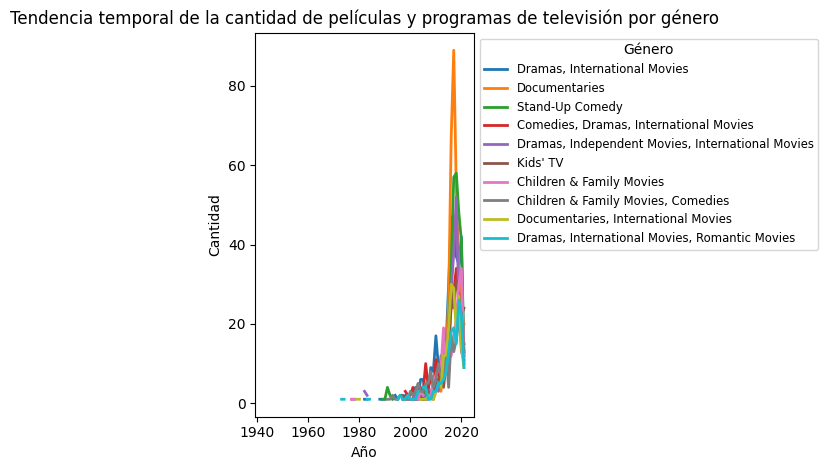

In [165]:
genre_counts = data_frame.groupby(['release_year', 'listed_in']).size().unstack()
# Obtener los 10 géneros más representativos
top_10_genres = genre_counts.sum().nlargest(10).index
# Filtrar el DataFrame con los 10 géneros más representativos
filtered_genre_counts = genre_counts[top_10_genres]
plt.figure(figsize=(12, 8))
filtered_genre_counts.plot(kind='line', linewidth=2)
plt.title('Tendencia temporal de la cantidad de películas y programas de televisión por género')
plt.xlabel('Año')
plt.ylabel('Cantidad')
# Generar la leyenda con los 10 géneros más representativos
plt.legend(title='Género', bbox_to_anchor=(1, 1), fontsize='small')
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q5.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Pregunta 6: ¿Cómo se distribuye el elenco de actores y actrices en diferentes países?

/var/folders/6j/g3h167pd5yq6sg2g3br58cgw0000gn/T/ipykernel_33848/2894004178.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x800 with 0 Axes>

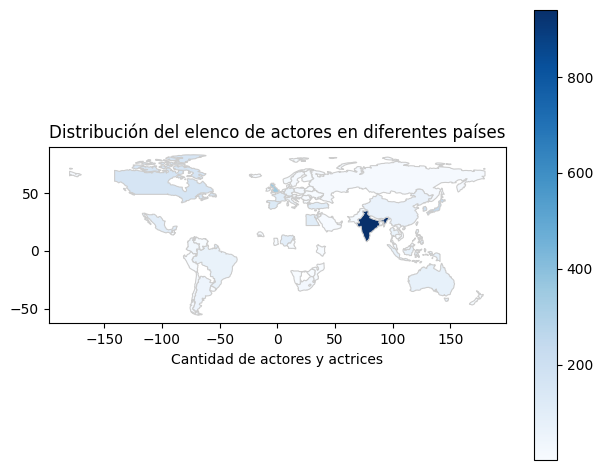

In [157]:
# Filtrar las filas que tienen valores nulos en 'country' o 'cast'
filtered_data = data_frame.dropna(subset=['country', 'cast'])
# Obtener la cuenta de actores y actrices por país
country_counts = filtered_data['country'].value_counts()
# Cargar los límites geográficos de los países en un GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Unir el GeoDataFrame con los datos de conteo de actores y actrices por país
world = world.merge(country_counts, left_on='name', right_index=True, how='left')
# Configurar la visualización del mapa de calor
plt.figure(figsize=(12, 8))
ax = world.plot(column='country', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Distribución del elenco de actores en diferentes países')
plt.xlabel('Cantidad de actores y actrices')
plt.tight_layout()
# Guardar la imagen en la carpeta "images" con alta calidad
plt.savefig('images/q6.png', dpi=300, bbox_inches='tight')
# Mostrar el mapa de calor
plt.show()

### Resultados en formato tabla

In [158]:
# Filtrar las filas que tienen valores nulos en 'country' o 'cast'
filtered_data = data_frame.dropna(subset=['country', 'cast'])
# Obtener la cuenta de actores y actrices por país
country_counts = filtered_data['country'].value_counts().reset_index()
# Renombrar las columnas de la tabla de resultados
country_counts.columns = ['País', 'Cantidad de Actores y Actrices']
# Mostrar la tabla de resultados
print(country_counts.head(10))

             País  Cantidad de Actores y Actrices
0   United States                            2488
1           India                             940
2  United Kingdom                             351
3           Japan                             240
4     South Korea                             196
5          Canada                             162
6           Spain                             127
7          France                             106
8           Egypt                             105
9          Turkey                             105


Según los resultados obtenidos, podemos concluir lo siguiente:

- Estados Unidos (United States) tiene la mayor cantidad de actores y actrices en la industria del entretenimiento, con un total de 2488 registros. Esto sugiere que Estados Unidos sigue siendo un líder destacado en la producción de películas y programas de televisión.

- India ocupa el segundo lugar en la lista, con 940 registros de actores y actrices. Esto refleja la gran influencia y popularidad de la industria del cine indio, conocida como Bollywood, tanto a nivel nacional como internacional.

- El Reino Unido (United Kingdom) se encuentra en el tercer lugar, con 351 registros. El cine y la televisión británicos han dejado una marca significativa en la industria, y se destaca por su diversidad y calidad en la producción de contenidos.

- Japón y Corea del Sur (South Korea) también se encuentran entre los países con una cantidad considerable de actores y actrices, con 240 y 196 registros respectivamente. Estos países son conocidos por su industria cinematográfica y televisiva única, que ha ganado popularidad global debido a su estilo distintivo y narrativas atractivas.

- Otros países como Canadá, España, Francia, Egipto y Turquía también tienen una presencia significativa en la industria del entretenimiento, con un número considerable de actores y actrices.

Estos resultados sugieren que la industria del cine y la televisión es diversa y abarca múltiples países, con diferentes culturas y enfoques creativos. Además, Estados Unidos e India siguen siendo actores dominantes en la producción de películas y programas de televisión, mientras que otros países también tienen un impacto significativo en la industria global del entretenimiento.